# Python para Ingeniería
## Ecuaciones Diferenciales
### Profesor: Juan Luis Herencia Guerra
### Email   : jherenciag@uni.edu.pe

### Ecuación Diferencial

Una Ecuación diferencial es una ecuación que involucra una variable dependiente y sus derivadas con respecto a una o más variables independientes. Muchas de las leyes de la naturaleza se encuentran expresadas de la forma más natural; en el lenguaje de las Ecuaciones diferenciales. 

Es fácil entender la razón detrás de esta amplia utilidad de las Ecuaciones diferenciales. Si recordamos que $y=f(x)$ es una función, entonces su derivada $dy/dx$ puede ser interpretada como el ritmo de cambio de $y$ con respecto a $x$. Cuando esta relación es expresada matemáticamente, el resultado generalmente es una Ecuación diferencial.

Ejemplo

$F=ma$

Donde $m$ es la masa del cuerpo y g es la aceleración debido a la gravedad. Si consideramos a u como la posición del objeto desde una altura determinada; entonces la velocidad de caída del objeto es $v=du/dt$, o sea, la derivada de la posición del objeto con respecto al tiempo; y como la aceleración de la gravedad es el cambio de la velocidad respecto al tiempo, $g=d^2u/dt^2$. Reescribiendo la segunda ley de Newton como la siguiente Ecuación diferencial.

$F=m(d^2u/dt^2)$

2da ley de la dinámica de Newton en función de la posición del objeto.

### Ecuaciones Diferenciales Ordinarias

$$F(x,y,y',...,y^{(n-1)})=y^{(n)}$$
where $y^{(n)}$ is the n-th derivative.
- La orden de una EDO es el valor mas alto de la derivada
- Los sistemas mecánicos son generalmente de 2do orden
- La 2da Ley de Newton $\mathbf{F=ma=m\ddot{x}}$

### Espacio de estado para sistemas de segundo orden
Definir ecuación vectorial

$$x = \begin{pmatrix} x_1\\x_2\end{pmatrix}=\begin{pmatrix}\chi\\\dot{\chi}\end{pmatrix}\Longrightarrow \dot{x}=\begin{pmatrix}x_2\\\frac{F}{m}\end{pmatrix}$$

### Integración numérica de una EDO
- Considere $\dot{x}=\alpha$
- Se puede usar pasos de tiempo, $dt$
- Ponemos $x(t_{k+1})=x(t_k)+\alpha dt$
- Si $\alpha(t)$ is es fijo, los resultados serán inexactos
- EDO estima cómo está cambiando el lado derecho y elige el mejor intervalo de tiempo $dt$.
- Solo funciona cuando el lado derecho es continuo

#### Resolver ODE con un solo componente de solución
$$dy/dt=2t$$

Se puede comprobar que su solución es:
$$y = t^2 + C$$

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
# función de la ec. diferencia
def f1(t, y):
    return 2*t  # y' = 2t
    # return y - t**2 + 1  # y' = y - t^2 + 1

In [12]:
'''
  a es la cota mínima
  b es la cota máxima
  y0  es condicion inicial
  f es la funcion
  N es la cantidad de pasos
'''


def Euler(a, b, y0, f, N):
    h = (b - a) / N
    w = y0
    t = a
    # print('t0 =', round(t,5), 'w0 =', round(w,5))
    Y, T = [], []
    for i in range(1, N+1):  # de 1 a N
        w = w + h*f(t, w)
        Y += [w]
        t = a + i*h
        T += [t]
        # print('t0 =', round(t,5), 'w0 =', round(w,5))
    return T, Y

In [13]:
# cotas desde 0 a 5, y0 = 0, usar funcion f1, 10 ptos
tr, yr = Euler(0, 5, 0, f1, 1000)

In [17]:
tr[399]

2.0

In [18]:
yr[399]

3.99

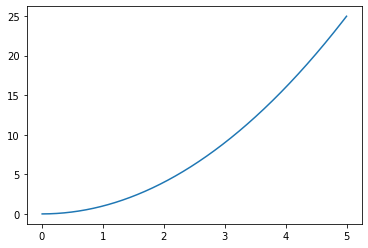

In [20]:
# Grafico
plt.plot(tr, yr)

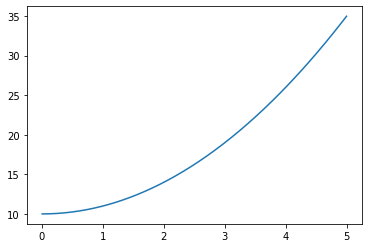

In [22]:
# cotas desde 0 a 5, y0 = 10, usar funcion f1, 1000 ptos
tr, yr = Euler(0, 5, 10, f1, 1000)  # solucion y = t^2 + 10
plt.plot(tr, yr)

In [31]:
# Funcion de Runge Kutta4
'''
  a es la cota mínima
  b es la cota máxima
  y0  es condicion inicial
  f es la funcion
  N es la cantidad de pasos
'''


def RK4(a, b, y0, f, N):
    h = (b - a) / N
    t = a
    w = y0
    # print('t0 =', round(t,5), 'w0 =', round(w,5))
    Y, T = [], []
    for i in range(1, N+1):  # de 1 a N
        k1 = h*f(t, w)
        k2 = h*f(t + h/2, w + k1/2)
        k3 = h*f(t + h/2, w + k2/2)
        k4 = h*f(t + h, w + k3)
        w = w + (k1 + 2*k2 + 2*k3 + k4) / 6
        Y += [w]
        t = a + i*h
        T += [t]
        # print('t0 =', round(t,5), 'w0 =', round(w,5))
    return T, Y

In [28]:
# cotas desde 0 a 5, y0 = 0, usar funcion f1, 10 ptos
RK4(0, 5, 0, f1, 10)  # solucion y = t^2

t0 = 0 w0 = 0
t0 = 0.5 w0 = 0.25
t0 = 1.0 w0 = 1.0
t0 = 1.5 w0 = 2.25
t0 = 2.0 w0 = 4.0
t0 = 2.5 w0 = 6.25
t0 = 3.0 w0 = 9.0
t0 = 3.5 w0 = 12.25
t0 = 4.0 w0 = 16.0
t0 = 4.5 w0 = 20.25
t0 = 5.0 w0 = 25.0


([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
 [0.25, 1.0, 2.25, 4.0, 6.25, 9.0, 12.25, 16.0, 20.25, 25.0])

t0 = 0 w0 = 0
t0 = 0.5 w0 = 0.25
t0 = 1.0 w0 = 1.0
t0 = 1.5 w0 = 2.25
t0 = 2.0 w0 = 4.0
t0 = 2.5 w0 = 6.25
t0 = 3.0 w0 = 9.0
t0 = 3.5 w0 = 12.25
t0 = 4.0 w0 = 16.0
t0 = 4.5 w0 = 20.25
t0 = 5.0 w0 = 25.0


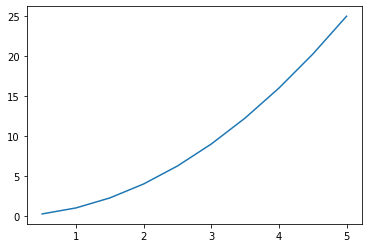

In [29]:
tr, yr = RK4(0, 5, 0, f1, 10)  # solucion y = t^2
plt.plot(tr, yr)

Resolver

$y' = y - t^2 + 1$

In [43]:
# función de la ec. diferencia
# Esta funcion delvuelve la derivada
def f1(t, y):
    return y - t**2 + 1  # y' = y - t^2 + 1

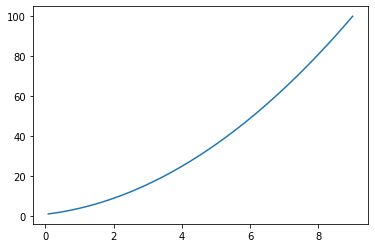

In [44]:
#
tr, yr = RK4(0, 9, 1, f1, 100)
plt.plot(tr, yr)

### Mas ejemplos

Hallar la solución para $dy(t)/dt = -k.y(t)$

Para $k = 0.3$ e $y0 = 5$

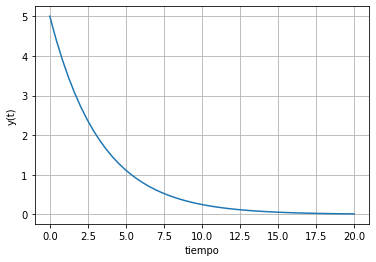

In [47]:
# función que retorna dy/dt
def model(y, t):
    k = 0.3
    dydt = -k * y
    return dydt


# Condicion inicial
y0 = 5

# dominio de puntos de t
t = np.linspace(0, 20)

# Resolver la EDO
# args para odeint: funcion(y(t), t), condicion inicial, ptos del dominio del tiempo
y = odeint(model, y0, t)

# Mostrar el gráfico
plt.plot(t, y)
plt.xlabel('tiempo')
plt.ylabel('y(t)')
plt.grid(True)
plt.show()

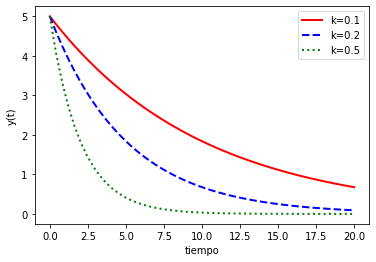

In [48]:
# Si tuviesemos que comparar graficos
# Por ejemplo para k igual 0.1, 0.2 y 0.3
# función que retorna dy/dt
def model(y, t, k):
    dydt = -k * y
    return dydt


# condicion inicial
y0 = 5

# dominio de puntos
t = np.linspace(0, 20)

# Resolver las EDO's
k = 0.1
y1 = odeint(model, y0, t, args=(k,))
k = 0.2
y2 = odeint(model, y0, t, args=(k,))
k = 0.5
y3 = odeint(model, y0, t, args=(k,))

# Mostrar los gráficos
plt.plot(t, y1, 'r-', linewidth=2, label='k=0.1')
plt.plot(t, y2, 'b--', linewidth=2, label='k=0.2')
plt.plot(t, y3, 'g:', linewidth=2, label='k=0.5')
plt.xlabel('tiempo')
plt.ylabel('y(t)')
plt.legend()
plt.show()

Resolver

$dy(t)/dt = -y(t) + 1$

Para $y(0) = 0$

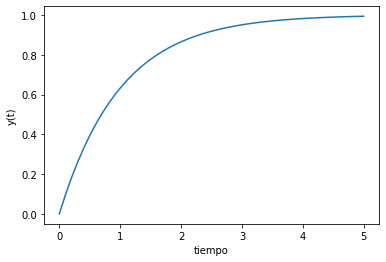

In [49]:
def model(y, t):
    dydt = -y + 1.0
    return dydt


y0 = 0

t = np.linspace(0, 5)

y = odeint(model, y0, t)

plt.plot(t, y)
plt.xlabel('tiempo')
plt.ylabel('y(t)')
plt.show()

Resolver

$5dy(t)/dt = -y(t) + u(t)$

Para $y(0) = 1$

$u$ pasos de 0 a 2 en $t = 10$

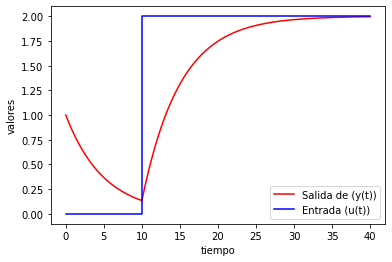

In [50]:
def model(y, t):
    # u steps from 0 to 2 at t=10
    if t < 10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt


y0 = 1

t = np.linspace(0, 40, 1000)

y = odeint(model, y0, t)

plt.plot(t, y, 'r-', label='Salida de (y(t))')
plt.plot([0, 10, 10, 40], [0, 0, 2, 2], 'b-', label='Entrada (u(t))')
plt.ylabel('valores')
plt.xlabel('tiempo')
plt.legend(loc='best')  # que se acomode mejor
plt.show()

Resolver para x(t) e  y(t) y mostrar las soluciones 

$dx(t)/dt = 3 exp(-t)$

$dy(t)/dt = 3 - y(t)$

$x(0) = 0$

$y(0) = 0$

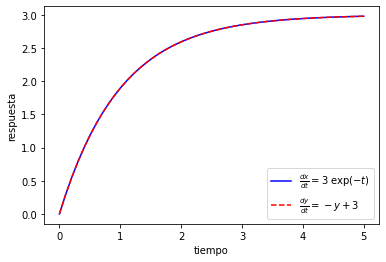

In [51]:
# función que returna dz/dt
def model(z, t):
    dxdt = 3.0 * np.exp(-t)
    dydt = -z[1] + 3
    dzdt = [dxdt, dydt]
    return dzdt


# condición inicial
z0 = [0, 0]

# dominio de t
t = np.linspace(0, 5)

# resolver la EDO
z = odeint(model, z0, t)

# plot results
plt.plot(t, z[:, 0], 'b-', label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t, z[:, 1], 'r--', label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('respuesta')
plt.xlabel('tiempo')
plt.legend(loc='best')
plt.show()

Resolver

$2dx(t)/dt = -x(t) + u(t)$

$5dy(t)/dt = -y(t) + x(t)$

$u = 2S(t - 5), x(0) = 0, y(0) = 0$

donde $S(t−5)$ es una función escalonada que cambia de cero a uno en $t=5$. Cuando se multiplica por dos, cambia de cero a dos al mismo tiempo, $t = 5$.

In [ ]:
# retorna dz/dt
def model(z, t, u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt, dydt]
    return dzdt


# condiciones iniciales
z0 = [0, 0]

# número de puntos
n = 401

# puntos de tiempo
t = np.linspace(0, 40, n)

# paso de entrada
u = np.zeros(n)
# cambio de 2.0 en el timepo = 5.0
u[50:] = 2.0

# guardar la solución
x = np.empty_like(t)
y = np.empty_like(t)
# guardar las condiciones iniciales
x[0] = z0[0]
y[0] = z0[1]

# Reolver la EDO
for i in range(1, n):
    # lapso para el próximo paso de tiempo
    tspan = [t[i-1], t[i]]
    # solve for next step
    z = odeint(model, z0, tspan, args=(u[i],))
    # guardar los datos para graficar
    x[i] = z[1][0]
    y[i] = z[1][1]
    # sgte condicion inicial
    z0 = z[1]

# graficar
plt.plot(t, u, 'g:', label='u(t)')
plt.plot(t, x, 'b-', label='x(t)')
plt.plot(t, y, 'r--', label='y(t)')
plt.ylabel('valores')
plt.xlabel('tiempo')
plt.legend(loc='best')
plt.show()